# Segmentación de hojas en plantas

## Proyecto final Visión artificial

### Integrantes:  - Andrés Stevens Arrieta Muñoz
####  - Rafael Angel Casalins Hernandez
####  - Alejandro Jiménez Zapata
####  - Carlos Andrés Mena Tobón
####  - Carlos Eduardo Ordoñez Bolañoz
####  - Luciana Serna Palacio

In [1]:
# Se importan las librerías necesarias 

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import cv2
import cv2 as cv
import os
from skimage.io import imread
import skimage.filters as filters
import os
from os import listdir

def plot(imagen,color='black',title=None,cmapa='gray',pic = False,subplot  = (1,1,1),vmin = 0, vmax = 255):
    if pic == True:
        plt.figure(figsize=(15,8))
    plt.subplot(subplot[0],subplot[1],subplot[2])
    plt.axis('off')
    plt.imshow(imagen,cmap = cmapa,vmin = vmin, vmax = vmax)
    plt.title(title,color = color)

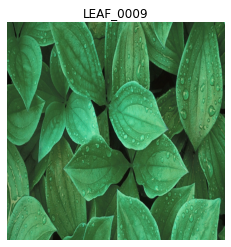

In [2]:
imagen = '0009'
carpeta = 'DataSet'
img_test = cv2.imread(f'{carpeta}/train/LEAF_{imagen}.jpg')
plot(img_test,subplot=(1,1,1) ,title=f'LEAF_{imagen}')

In [3]:
# Rojo
abc_r = (1,0,0)
# Verde
abc_g = (0,1,0)
# Azul
abc_b = (0,0,1)

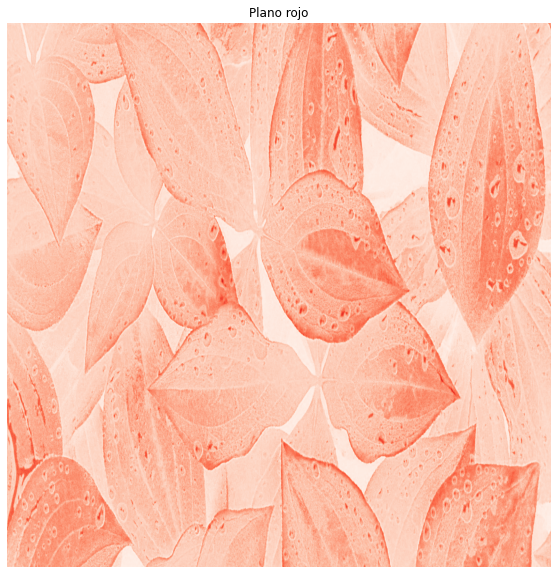

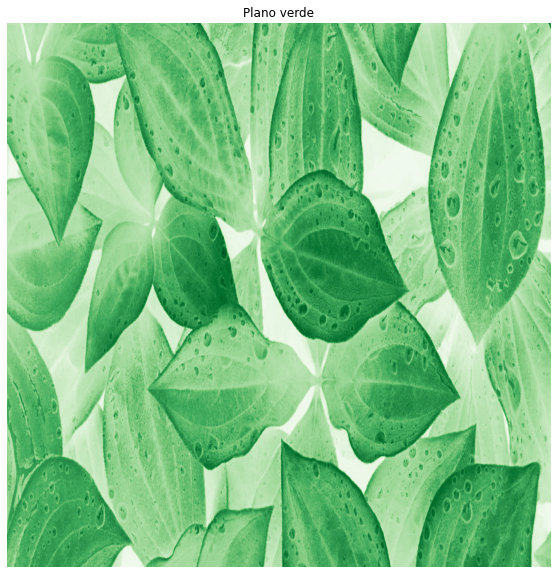

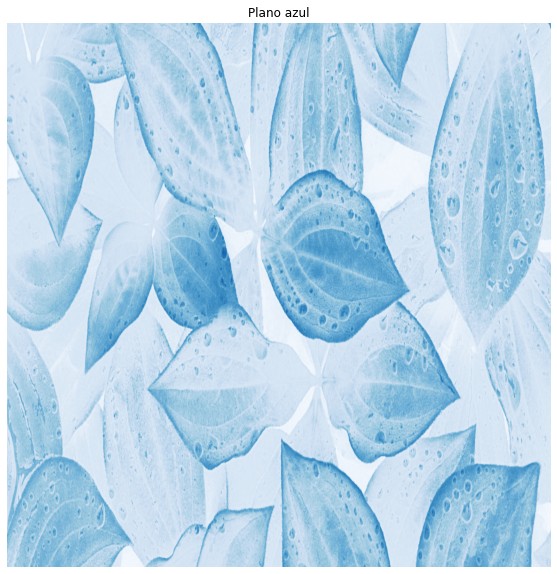

In [4]:
imagen_r = np.dot(img_test,abc_r)
imagen_g = np.dot(img_test,abc_g)
imagen_b = np.dot(img_test,abc_b)

plt.figure(figsize=(20,10))

plot(imagen_r,title="Plano rojo", cmapa='Reds')

plt.figure(figsize=(20,10))
plot(imagen_g, title="Plano verde", cmapa='Greens')

plt.figure(figsize=(20,10))
plot(imagen_b, title="Plano azul", cmapa='Blues')

In [47]:
cv2.imwrite(f'DataSet/Canales/R/LEAF_{imagen}.jpg',imagen_r)


True

In [5]:
files = listdir('DataSet/train')
print(files[0:20])

['LEAF_0009.jpg', 'LEAF_0010.jpg', 'LEAF_0011.jpg', 'LEAF_0012.jpg', 'LEAF_0013.jpg', 'LEAF_0014.jpg', 'LEAF_0015.jpg', 'LEAF_0016.jpg', 'LEAF_0017.jpg', 'LEAF_0018.jpg', 'LEAF_0019.jpg', 'LEAF_0020.jpg', 'LEAF_0021.jpg', 'LEAF_0022.jpg', 'LEAF_0023.jpg', 'LEAF_0024.jpg', 'LEAF_0025.jpg', 'LEAF_0026.jpg', 'LEAF_0027.jpg', 'LEAF_0028.jpg']


In [49]:
for name in files:
    img_or = cv2.imread(f'DataSet/train/{name}')
    imagen_r = np.dot(img_or,abc_r)
    imagen_g = np.dot(img_or,abc_g)
    imagen_b = np.dot(img_or,abc_b)
    cv2.imwrite(f'DataSet/Canales/R/{name}',imagen_r)
    cv2.imwrite(f'DataSet/Canales/G/{name}',imagen_g)
    cv2.imwrite(f'DataSet/Canales/B/{name}',imagen_b)
    


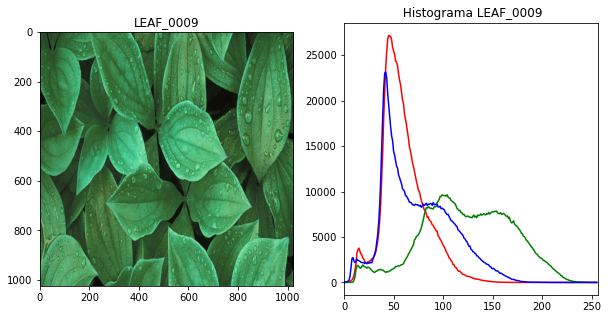

In [6]:
def plot_img_hist (image,title,subrows,subcols,num,size1,size2):
    fig = plt.figure(figsize=(size1,size2))
    plt.subplot(subrows,subcols,num)
    plt.imshow(image,cmap='gray');plt.title(title)
    color = ('r','g','b')
    plt.subplot(subrows,subcols,num+1)
    plt.title(" Histograma " + title)

    if len(image.shape) > 2 :            
        for i,col in enumerate(color):
            histr = cv2.calcHist([image],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
    else:
        hist,bins = np.histogram(image.ravel(),256,[0,256])
        plt.plot(hist, color='gray' )
        plt.xlim([0,256])

plot_img_hist(img_test,f'LEAF_{imagen}',1,2,1,10,5)

In [13]:
for name in files[0:30]:
        img_or = cv2.imread(f'DataSet/train/{name}')
        plot_img_hist(img_or,f'{name}',1,2,1,10,5)
        plt.savefig(f'DataSet/Histograms/{name}')
        plt.close()
